# Creazione modello per previsione SQUAT

> Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
shift = 5
rolling_periods = 3

## Import dati

In [3]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/'

In [4]:

df_raw = pd.read_csv(path+'artabax/data_modelli/shoulderpress_20221219_0423PM.csv' , sep=',' , decimal='.')

df_raw.reset_index(drop=True, inplace=True)

##bar_zero = df_raw['BAR'][0]
#df_raw['BAR'] = (df_raw['BAR']/bar_zero)
df_raw.set_index('Time', inplace=True)
df_raw

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
Time,,,,,,,,,,,,
1671463298681,9.8938,-0.2539,2.9626,-6.86,4.62,-2.52,1.0000,0.0,0.0,0,0,0
1671463298792,9.9681,-0.0096,2.7112,5.67,-0.21,-3.64,1.0000,0.0,0.0,0,0,0
1671463298905,9.7789,-0.0407,2.5579,0.63,-0.77,-0.63,1.0000,0.0,0.0,0,0,0
1671463299017,9.9968,0.0383,2.8070,-2.24,3.92,-1.12,1.0000,0.0,0.0,0,0,0
1671463299129,9.8723,0.0982,2.8213,0.91,0.84,-1.89,1.0000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1671463414857,9.4795,3.3650,-1.6118,10.78,-5.25,-19.67,1.0000,0.0,0.0,0,0,0
1671463414969,9.6376,3.7674,-1.4155,7.84,6.23,-9.03,1.0000,0.0,0.0,1,0,0
1671463415081,9.7094,3.2429,-0.9436,-4.06,9.17,-3.50,1.0000,0.0,0.0,0,0,0


In [5]:
df = df_raw.copy()
df.dropna(inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
Time,,,,,,,,,,,,
1671463298681,9.8938,-0.2539,2.9626,-6.86,4.62,-2.52,1.0000,0.0,0.0,0,0,0
1671463298792,9.9681,-0.0096,2.7112,5.67,-0.21,-3.64,1.0000,0.0,0.0,0,0,0
1671463298905,9.7789,-0.0407,2.5579,0.63,-0.77,-0.63,1.0000,0.0,0.0,0,0,0
1671463299017,9.9968,0.0383,2.8070,-2.24,3.92,-1.12,1.0000,0.0,0.0,0,0,0
1671463299129,9.8723,0.0982,2.8213,0.91,0.84,-1.89,1.0000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1671463414857,9.4795,3.3650,-1.6118,10.78,-5.25,-19.67,1.0000,0.0,0.0,0,0,0
1671463414969,9.6376,3.7674,-1.4155,7.84,6.23,-9.03,1.0000,0.0,0.0,1,0,0
1671463415081,9.7094,3.2429,-0.9436,-4.06,9.17,-3.50,1.0000,0.0,0.0,0,0,0


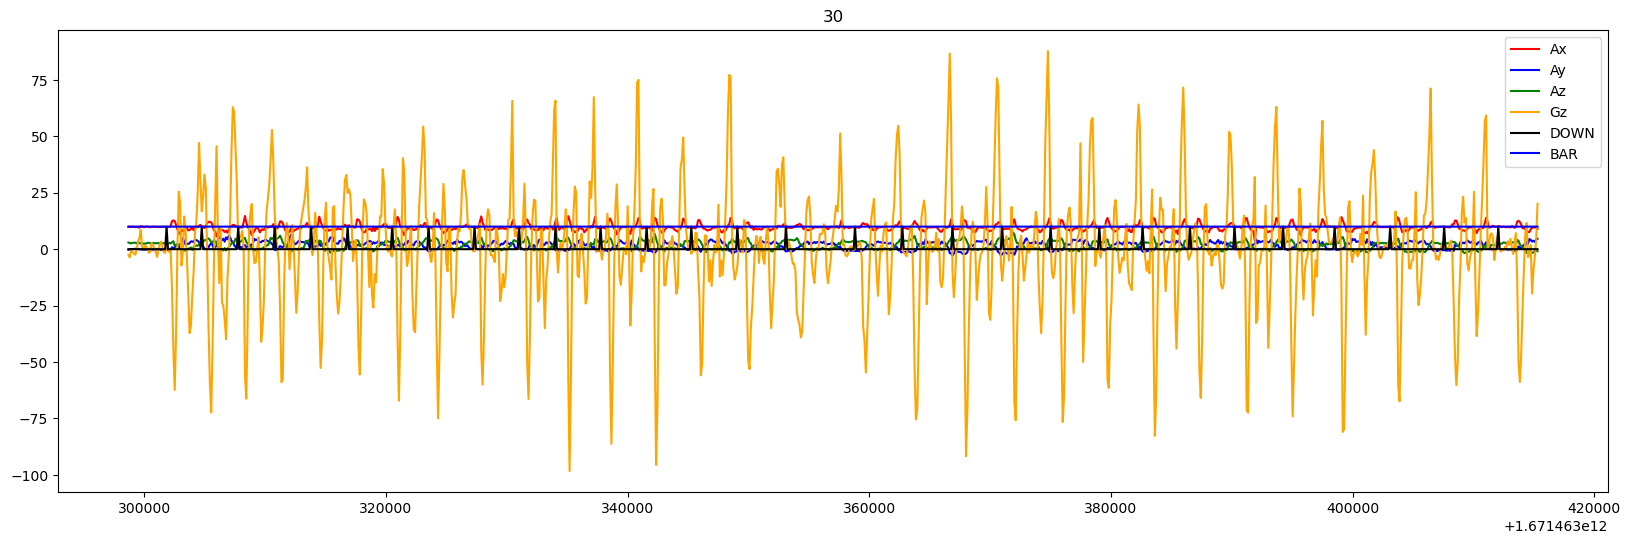

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df['Ax'], color='red', label='Ax')
plt.plot(df['Ay'], color='blue', label='Ay')
plt.plot(df['Az'], color='green', label='Az')
plt.plot(df['Gz'], color='orange', label='Gz')
plt.plot(df['DOWN']*10, color='black', label='DOWN')
plt.plot(df['BAR']*10, color='blue', label='BAR')
plt.legend()
count = df['DOWN'].value_counts()[1]
plt.title(count)
plt.show()

## Preparazione datasets

In [7]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 
y = df['DOWN']
X = df.copy()
#X.drop(columns=['DOWN','UP', 'Time'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=None)

df.head

<bound method NDFrame.head of                    Ax      Ay      Az     Gx     Gy     Gz     BAR    P    R  \
Time                                                                           
1671463298681  9.8938 -0.2539  2.9626  -6.86   4.62  -2.52  1.0000  0.0  0.0   
1671463298792  9.9681 -0.0096  2.7112   5.67  -0.21  -3.64  1.0000  0.0  0.0   
1671463298905  9.7789 -0.0407  2.5579   0.63  -0.77  -0.63  1.0000  0.0  0.0   
1671463299017  9.9968  0.0383  2.8070  -2.24   3.92  -1.12  1.0000  0.0  0.0   
1671463299129  9.8723  0.0982  2.8213   0.91   0.84  -1.89  1.0000  0.0  0.0   
...               ...     ...     ...    ...    ...    ...     ...  ...  ...   
1671463414857  9.4795  3.3650 -1.6118  10.78  -5.25 -19.67  1.0000  0.0  0.0   
1671463414969  9.6376  3.7674 -1.4155   7.84   6.23  -9.03  1.0000  0.0  0.0   
1671463415081  9.7094  3.2429 -0.9436  -4.06   9.17  -3.50  1.0000  0.0  0.0   
1671463415193  9.5657  4.2991 -0.5628  23.73  13.37   3.57  1.0000  0.0  0.0   
1671463415

## Logistic Regression

In [8]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])

      Logistic
Reg           
DOWN  5.222999
Ay   -0.395894
Az    0.364066
Ax   -0.244211
Gx    0.030242
Gy    0.026228
UP   -0.022754
Gz    0.008529
BAR   0.000013
P          0.0
R          0.0
prob       0.0
b0: -3.286382795989014


LogReg Training Accuracy is:  1.0
LogReg Testing Accuracy is:  0.9952153110047847


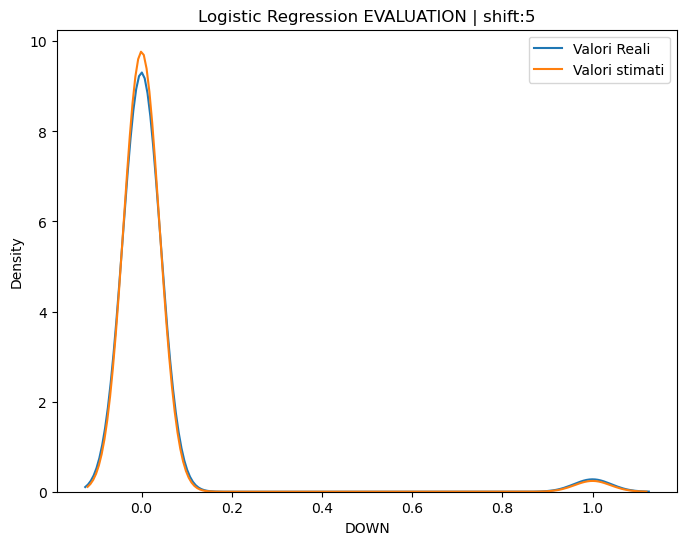

In [9]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()


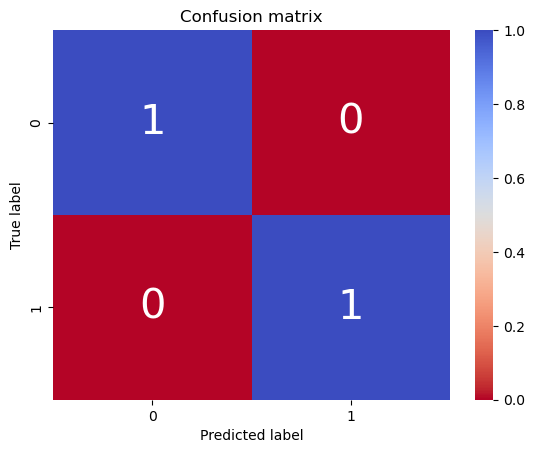

In [10]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [11]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [1. 1.]
The Precision is: [1. 1.]
The False positive rate is: [0. 0.]
The False Negative Rate is:  [0. 0.]


In [12]:
# Running Log loss on training
pred_proba_train = log_reg.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba_train))

# Running Log loss on testing
pred_proba_test = log_reg.predict_proba(X_test)
print("The Log Loss on Test is: ", log_loss(y_test, pred_proba_test))

The Log Loss on Training is:  0.013838529576413513
The Log Loss on Test is:  0.028172898629465398


In [13]:
# Looping over the parameters
hyper_size = 20

C_List = np.geomspace(1e-5, 1e5, num=hyper_size)
CA = [] #classification accuracy
Logarithmic_Loss = [] #log ross

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    # print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_test = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_Loss.append(log_loss2)
    # print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    # print("")
    
#putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(hyper_size,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(hyper_size,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,index,C_List,CA2,Logarithmic_Loss2
0,19,100000.000000,1.000000,0.000001
1,18,29763.514416,1.000000,0.000005
2,17,8858.667904,1.000000,0.000011
3,16,2636.650899,1.000000,0.000028
4,15,784.759970,1.000000,0.000104
5,14,233.572147,1.000000,0.000302
6,13,69.519280,1.000000,0.000866
7,12,20.691381,1.000000,0.002424
8,11,6.158482,1.000000,0.006624
9,10,1.832981,1.000000,0.017628


In [14]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)

Log_reg4 = LogisticRegressionCV(random_state=5, Cs = C_List, solver ='lbfgs', cv=kf)
Log_reg4.fit(X_train, y_train)
print("The CA is:", Log_reg4.score(X_test, y_test))
pred_proba_t = Log_reg4.predict_proba(X_test)
log_loss4 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss4)
print("The optimal C parameter is: ", Log_reg4.C_)

/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paoloartasensi/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

The CA is: 1.0
The Logistic Loss is:  0.017618678530745845
The optimal C parameter is:  [1.83298071]
